<br>

# Técnicas Matemáticas para Big Data - Project NN?
<br><br>


GROUP NN:
- Student 1 - Nº xxxxx - ??% Work Participation
- Student 2 - Nº xxxxx - ??% Work Participation
- Student 3 - Nº xxxxx - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]



Fuzzy logic is amongst the techniques that have emerged and been used in diverse practical control systems such as artificial intelligence, medicine, and economics, where stringent degrees of accuracy are not necessary, and a measure of uncertainty is required. This project seeks to portray the working principles and application of fuzzy logic within the domain of household electric power consumptions.

The energy consumption of households has never failed to attract attention, and in contemporary times it is regarded as an accelerating benefit together with energy saving and environmental preservation. Household energy consumption levels are dependent on several factors such as the weather (temperature and humidity), and the time of the day which are influenced by behavioral cycles. Being capable of understanding and predicting energy consumption load in a more accurate way leads to better forecast of energy supply requirements, its distribution and results in savings on the energy expenses. The role of this study is to simulate the energy usage of a household and show how certain external factors such as temperature, humidity, and time of the day contribute to variation in energy usage. Fuzzy logic is an appropriate tool as it helps capture the uncertainty and ambiguity that is associated with both human actions and the external environment.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]


The project employs the fuzzy logic approach to estimate the household energy consumption (`active_energy`) which is the consumption ‘active_energy’ of households by predicting interdependencies between temperature, and time of day. It is interesting to note that fuzzy logic is preferred because it enables the use of imprecise data for example “high temperature” or “evening” is real doesn’t have an exact definition and logic gives way to easiness by imprecision concept.

The dataset consists of weather and energy records at a closer level of detail based on temp (temperature) and hour (the time of day). The model specifies rules for how combinations of these fuzzy variables set with membership functions such as ‘temp’-low, moderate, high, affect the levels of active_energy. Before setting up the fuzzy logic rules;

- Extracted relevant columns for analysis, including humidity, temperature, and time.
- Fuzzified each variable into various classes.
- Concatenated the newly generated class columns for each variable of interest.


 This approach enabled us to design rules that better reflect real-world interactions between conditions like temperature fluctuations, daily routines, and household energy use patterns.



<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]


Several studies have demonstrated the effectiveness of fuzzy logic in energy prediction. For instance, researchers have applied fuzzy logic to model energy consumption based on weather parameters, finding it effective for interpreting the nonlinear and uncertain impacts of factors like temperature and humidity on energy demand. Other studies combine fuzzy logic with machine learning algorithms (like fuzzy neural networks) for even more complex predictions. The application in household energy consumption is particularly relevant as it enables a nuanced understanding of how fluctuating environmental conditions influence daily energy needs, making it valuable for energy conservation and smart home applications.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]


The main method used in this study is fuzzy logic, a rule-based approach that handles imprecise and vague data by transforming crisp inputs (like exact temperature or time) into fuzzy values (e.g., "moderate" temperature). Fuzzy logic systems consist of three main components: fuzzification, rule evaluation, and defuzzification.

1. **Data analysis**: This stage sets up the process of determining the input variables. In order to apply the rules, a preliniminary exploratory analysis will be. done within the variables to determine the variables most important and relevant to our output

1. **Fuzzification**: The model first converts crisp values for `temp` and `hour` into fuzzy sets based on predefined membership functions. For example, a temperature of 25°C might belong partially to "moderate" and "high" fuzzy sets, with membership degrees calculated using triangular functions
   
2. **Rule Evaluation**: The model applies a set of if-then rules to interpret how different fuzzy conditions should influence `active_energy`. For instance, rules might state: *If temperature is high and time is afternoon, then active energy is high*. These rules help capture the relationship between environmental factors and energy use patterns.

3. **Defuzzification**: Finally, the fuzzy results are converted back into a crisp output value (like a specific `active_energy` level) that can be compared with actual energy usage. The defuzzified output allows for an interpretable prediction that approximates household energy consumption based on the fuzzy conditions.

Fuzzy logic's flexibility and interpretability make it a suitable choice for modeling complex, uncertain relationships in energy consumption, especially where exact input-output relationships are challenging to define. This approach's main advantage is its ability to handle the ambiguity of real-world conditions, providing an intuitive, human-like way to model energy demand based on weather and time patterns.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [3]:
# %pip install seaborn
%pip install pandas
%pip install matplotlib
%pip install meteostat
# %pip install numpy
# %pip install pomegranate
# %pip install torch
# %pip install Pillow

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from datetime import datetime
from meteostat import Point, Hourly

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

The first dataset is electric power consumption data from a house with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available. The dataset has 2,075,259 rows and 9 columns. The dataset is available at: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

In [ ]:
power_data = pd.read_csv('household_power_consumption.csv', delimiter=';', low_memory=False)
power_data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
# calculate 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
# parse numeric columns
power['Global_active_power'] = pd.to_numeric(power['Global_active_power'], errors='coerce')
power['Sub_metering_1'] = pd.to_numeric(power['Sub_metering_1'], errors='coerce')
power['Sub_metering_2'] = pd.to_numeric(power['Sub_metering_2'], errors='coerce')
power['Sub_metering_3'] = pd.to_numeric(power['Sub_metering_3'], errors='coerce')

power['active_energy'] = (power['Global_active_power']*1000/60 - power['Sub_metering_1'] - power['Sub_metering_2'] - power['Sub_metering_3'])


The second dataset is generated with meteostat library and additionaly script

```python
start = datetime(2006, 12, 16)
end = datetime(2010, 11, 26)
location = Point(48.77644, 2.29026, 75) #Sceaux, France
meteodata = Hourly(location, start, end)
meteodata = meteodata.fetch()
meteodata.to_csv('sceaux_hourly_temperatures.csv', sep=';')
```

In [ ]:
meteo_data = pd.read_csv('sceaux_hourly_temperatures.csv', delimiter=';', low_memory=False)
meteo_data.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2006-12-16 00:00:00,6.0,3.0,81.0,NaN,NaN,210.0,14.8,NaN,1023.9,NaN,NaN
1,2006-12-16 01:00:00,5.3,2.6,83.0,0.0,NaN,200.0,7.6,NaN,1023.7,NaN,NaN
2,2006-12-16 02:00:00,4.9,2.4,84.0,0.0,NaN,200.0,11.2,NaN,1023.3,NaN,NaN
3,2006-12-16 03:00:00,4.0,2.0,87.0,NaN,NaN,170.0,11.2,NaN,1022.8,NaN,NaN
4,2006-12-16 04:00:00,4.2,2.7,90.0,0.0,NaN,200.0,14.8,NaN,1022.5,NaN,NaN


To merge this datasets into a single one, we will use the date and time columns. The datasets use different formats for the date and time columns, so we will need to convert them to a common format before merge.

In [ ]:
power_data['timestamp'] = pd.to_datetime(power_data['Date'] + ' ' + power_data['Time'], format='%d/%m/%Y %H:%M:%S')
meteo_data['timestamp'] = pd.to_datetime(meteo_data['time'], format='%Y-%m-%d %H:%M:%S')
data = pd.merge(power_data, meteo_data, on='timestamp', how='inner')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp,...,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,16/12/2006,18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0,2006-12-16 18:00:00,...,4.2,83.0,NaN,NaN,340.0,14.8,NaN,1026.8,NaN,NaN
1,16/12/2006,19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0,2006-12-16 19:00:00,...,3.7,83.0,0.0,NaN,340.0,14.8,NaN,1027.5,NaN,NaN
2,16/12/2006,20:00:00,3.206,0.078,232.430,13.800,0.000,0.000,16.0,2006-12-16 20:00:00,...,4.0,87.0,0.0,NaN,310.0,7.6,NaN,1028.0,NaN,NaN
3,16/12/2006,21:00:00,3.314,0.072,236.760,14.000,0.000,0.000,17.0,2006-12-16 21:00:00,...,3.8,88.0,NaN,NaN,310.0,7.6,NaN,1028.6,NaN,NaN
4,16/12/2006,22:00:00,3.464,0.170,236.030,14.600,0.000,1.000,17.0,2006-12-16 22:00:00,...,3.8,91.0,0.0,NaN,260.0,7.6,NaN,1028.9,NaN,NaN


Here there are many variables, but we will use only three ones: time, active power and temperature. The dataset has 34,567 rows.

#### variable explaination

-  temp: The air temperature (°C)
-active_energy: An additional measure of energ that captures active energy used in the household.
- time_minutes: timestamp converted to time in minutes

In [ ]:
### lets extract our variable of interest

data=data[['timestamp','active_energy', 'temp' ]]

# Convert timestamp to datetime and then to time
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S').dt.time

# Convert times to minutes since midnight
data['time_minutes'] = data['timestamp'].apply(lambda t: t.hour * 60 + t.minute)




<br><br>

## 7. Main code as possible solution to the problem [1,5 valor]

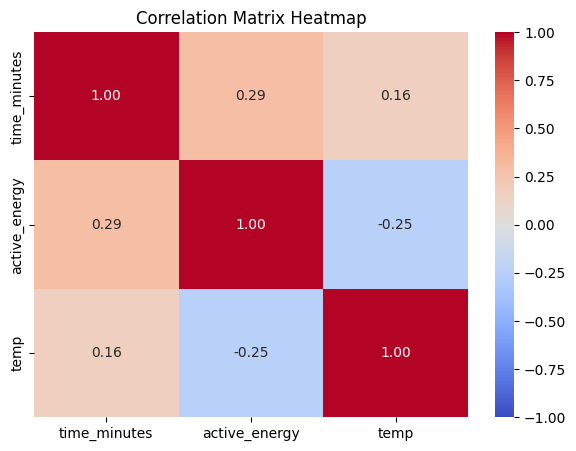

In [19]:
data=data[['time_minutes','active_energy', 'temp' ]]

#heatmap to better understand relationship between variables.

# Compute correlation matrix for these columns
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


**Fuzzy Membership Degree Calculation**

**Quantile Calculation and Fuzzy Interpolation Initialization**

**Membership Degree Calculation for Temperature, Time, and Energy**

<br><br>

## 8. Analysis of Example 1 [3,0 valor]

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

<br><br>
## 11. Future improvements [2,0 valor]

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>
